**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 09:** Melhorando a Política

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula09_policy_improvement.ipynb)

# Objetivo da Aula

Queremos criar um **oráculo**. Entretanto, o nosso oráculo tem uma diferença daqueles feitos nas primeiras aulas desta disciplina. Vamos lembrar do que o nosso antigo oráculo fazia:

* O nosso oráculo do início da disciplina era capaz de responder alguma pergunta do tipo:
    * Vai chover amanhã?
    * Qual o tempo de duração da erupção do geyzer?
    * Essa pessoa morreu no naufrágio?

Agora o nosso oráculo deve resolver um tipo diferente de pergunta. Ele deve nos ajudar a fazer algum tipo de planejamento, ao invés de responder a alguma pergunta simples. Em outras palavras, pense no cenário:

1. Você está preso em um labirinto e possui vários caminhos a seguir.
2. Você não sabe exatamente o que fazer e precisa de um oráculo que lhe diga: devo mudar de diração para a esquerda, para a direita ou seguir em frente?

Um outro cenário para este novo tipo de oráculo seria:

1. Você está jogando um jogo  contra um oponente forte.
2. Você quer saber qual a melhor jogada a ser feita. Devo mover meu cavalo para uma casa específica ou capturar um peão com o meu bispo?

Note que este oráculo também pretende lhe dar uma resposta correta, mas o cenário onde ele atua é diferente do que estamos habituados.

# Utilidade do Valor Esperado

Até o momento, aprendemos como computar os valor esperado do retorno acumulado descontado quando o agente se move de maneira aleatória por um conjunto de estados. Entretanto, não explicamos ainda para que isso serve. Nesse caso, vamos voltar aos exemplos das aulas anteriores para fornecer uma intuição sobre o motivo de computarmos o valor esperado.

## Cenário da Aula Passada

A figura a seguir mostra tudo o que precisamos lembrar. A política deve ser entendida como a estratégia seguida pelo agente. No caso deste cenário, o nosso robô jardineiro é muito pouco inteligente e simplesmente se move ao acao.

**Política**: vamos considerar uma política que segue a distribuição uniforme de probabilidade. Em outras palavras, em qualquer estado, o agente tem 25% de probabilidade para se mover em qualquer direção.

![alt text](http://www.ic.unicamp.br/~udias/si202/grid_world_01.png)

Descobrimos depois de alguns cálculos que os valores de estado (ou seja, o valor esperado do custo acumulado ao iniciar em um dado estado e seguindo uma política aleatória) são:

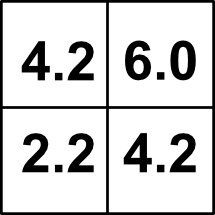

O agente pode então melhorar a política com a seguinte linha de raciocínio. Vamos assumir que o agente está inicialmente no estado $A$ e depois deixamos para você pensar no que aconteceria nos outros estados. O robô jardineiro deve pensar:

* Se estou no estado $A$, tenho quatro opções de ações:

  1. **Ir para cima.** Nesse caso, tenho um retorno imediato de $0$ e uma promessa de retorno a longo prazo de 4.2 por ter parado novamente no estado $A$ quando o fator de desconto $\gamma = 0.7$. Nesse caso, o retorno assumido desta ação seria: $r + \gamma V_{\pi}(A) = 0 + 0.7 \times 4.2 = 2.94$

  2. **Ir para direita.** Nesse caso, tenho um retorno imediato de $5$ e uma promessa de retorno a longo prazo de 6.0 por ter parado  no estado $B$ quando o fator de desconto $\gamma = 0.7$. Nesse caso, o retorno assumido desta ação seria: $r + \gamma V_{\pi}(A) = 5 + 0.7 \times 6.0 = 9.20$

  3. **Ir para baixo.** Nesse caso, tenho um retorno imediato de $0$ e uma promessa de retorno a longo prazo de 2.2 por ter parado  no estado $C$ quando o fator de desconto $\gamma = 0.7$. Nesse caso, o retorno assumido desta ação seria: $r + \gamma V_{\pi}(A) = 0 + 0.7 \times 2.2 = 1,54$

  4. **Ir para esquerda.** Nesse caso, tenho um retorno imediato de $0$ e uma promessa de retorno a longo prazo de 4.2 por ter parado novamente no estado $A$ quando o fator de desconto $\gamma = 0.7$. Nesse caso, o retorno assumido desta ação seria: $r + \gamma V_{\pi}(A) = 0 + 0.7 \times 4.2 = 2.94$

Baseado nessa linha de raciocínio, o agente deve entender que a escolha mais acertada seria ir para o estado $B$, ao invés de se mover ao acaso, porque isso lhe trará um retorno melhor do qualquer outra ação.

## Biblioteca Visual

Na aula de hoje, iremos entender como ocorre o processo de aprendizado usando o que já conhecemos. Para tanto, iremos utilizar um exemplo um pouco mais complexo, um grid maior que o que vimos em anteriormente.

Algumas bibliotecas foram implementadas especificamente para esta disciplina, para imprimir na tela os resultados da computação dos *state values* e da política. Vejamos principalmente como a biblioteca funciona.

O primeiro passo será incluir a biblioteca no colab.

In [1]:
## Efetuando o download do código da biblioteca
!wget https://www.ic.unicamp.br/~udias/si202/grid_world.py

## Importando a biblioteca
import grid_world as gw

--2023-10-20 22:45:42--  https://www.ic.unicamp.br/~udias/si202/grid_world.py
Resolving www.ic.unicamp.br (www.ic.unicamp.br)... 143.106.7.54, 2801:8a:40c0:cafe::54
Connecting to www.ic.unicamp.br (www.ic.unicamp.br)|143.106.7.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2668 (2.6K)
Saving to: ‘grid_world.py’

grid_world.py       100%[===================>]   2.61K  --.-KB/s    in 0s      

2023-10-20 22:45:43 (117 MB/s) - ‘grid_world.py’ saved [2668/2668]



A biblioteca nos fornece as seguintes funções:

1. **draw_policy(policy):** Mostra a política, como uma lista de probabilidades.

2. **draw_state_values(state_values):** Mostra os state_values, um valor em cada quadradinho

3. **display_sequence(images):** Mostra uma sequência de imagens na tela, sendo
que o usuário pode ir para um frame específico

Vamos agora aprender a usar cada uma dessas funções assumindo que temos um grid 2x2

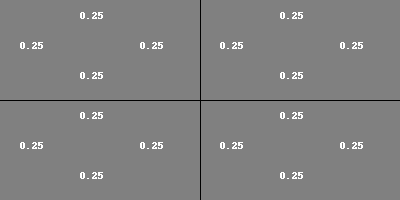

In [2]:
##########
## draw_policy
##########

## Aqui vamos colocar as probabilidades de ação
## de uma célula genérica
policy_cell   = [0.25, 0.25, 0.25, 0.25] # cima, direita, baixo e esquerda.

## Aqui vamos colocar a política, ou seja, a
## probabilidade de todas as ações em todos os
## estadso
policy  = [[policy_cell for i in range(2)] for j in range(2)]

## Agora vamos colocar a política na tela.
gw.draw_policy(policy)

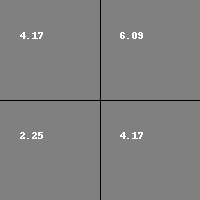

In [3]:
##########
## draw_state_values
##########

## Vamos colocar um valor de estado parecido com o
## que vimos em aulas anteriores.
state_values = [[4.17, 6.09],[2.25, 4.17]]

## Colocando os state_values na tela
gw.draw_state_values(state_values)

In [4]:
##########
## diplay_sequence
##########

## Vamos colocar na tela uma sequência de frames.
## Usaremos como exemplo a convergência do
## bootstrapping vista em aulas anteriores

bootstrapping = [
    [[0.00 , 0.00] , [0.00 , 0.00]],
    [[1.25 , 2.50] , [0.00 , 1.25]],
    [[2.12 , 3.81] , [0.44 , 2.12]],
    [[2.74 , 4.58] , [0.90 , 2.74]],
    [[3.17 , 5.06] , [1.27 , 3.17]],
    [[3.47 , 5.38] , [1.55 , 3.47]],
    [[3.68 , 5.60] , [1.76 , 3.68]],
    [[3.82 , 5.75] , [1.90 , 3.82]],
    [[3.93 , 5.85] , [2.00 , 3.93]],
    [[4.00 , 5.92] , [2.08 , 4.00]],
    [[4.05 , 5.97] , [2.13 , 4.05]],
    [[4.08 , 6.01] , [2.16 , 4.08]],
    [[4.11 , 6.03] , [2.19 , 4.11]],
    [[4.13 , 6.05] , [2.20 , 4.13]],
    [[4.14 , 6.06] , [2.22 , 4.14]],
    [[4.15 , 6.07] , [2.22 , 4.15]],
    [[4.15 , 6.08] , [2.23 , 4.15]],
    [[4.16 , 6.08] , [2.23 , 4.16]],
    [[4.16 , 6.08] , [2.24 , 4.16]],
    [[4.16 , 6.08] , [2.24 , 4.16]]
]
images = []
for value in bootstrapping :
  images.append(gw.draw_state_values(value))
gw.display_sequence(images)

interactive(children=(IntSlider(value=9, description='frame', max=19), Output()), _dom_classes=('widget-intera…

<function grid_world.display_sequence.<locals>._show(frame=(0, 19))>

# Novo Cenário

Vamos ver como a escolha da melhor política funciona em um exemplo um pouco maior que o das aulas anteriores.

Considere o grid quatro por quatro mostrado aqui. Os estados terminais são localizados nos cantos superior esquerdo e inferior direito.
![alt text](http://www.ic.unicamp.br/~udias/si202/grid_world_02.png)

Em outras palavras, assuma que este grid representa uma caixa onde será colocado um ratinho. O objetivo do ratinho é fugir desta caixa no menor intervalo de tempo possível, mas ele não sabe onde é a saída. A cada segundo, o ratinho  se moverá de uma célula para outra até chegar em uma das saídas (localizadas nos cantos superior esquerdo e inferior direito).

Se uma ação mover o agente para fora da grade, ele será mantido no mesmo estado, o que representa o fato de o ratinho ter batido na parede.


## Recompensa

Como o objetivo do ratinho é fugir da caixa, devemos recompensar mais quando ele conseguir fugir mais rápido. Isso também pode ser visto de outra forma, podemos penalizar mais os ratinhos que demorarem muito para sair. Esta segunda forma de pensar leva a uma estratégia mais rápida de resolução do problema.

A cada movimento do ratinho de uma célula para outra, ele receberá uma penalidade, que aqui representaremos como a atribuição do valor $-1$. Você pode imaginar esse valor $-1$ como um choque que o ratinho leva (nada muito agressivo, um choque leve).

O ratinho quer sair da caixa levando o mínimo de choques possível. Isso quer dizer que ele quer receber o mínimo de recompensa $-1$.  

## Política

Vamos começar com uma política de distribuição aleatória uniforme. Em outras palavras, em cada célula o ratinho pode escolher uma das quatro células ao redor para se mover com uma probablidade de $\frac{1}{4}$.


In [5]:
## Em cada célula o ratinho tem uma recompensa
## negativa de -1, ou seja, está levando um
## choque leve.
rewards = [
    [-1, -1, -1, -1],
    [-1, -1, -1, -1],
    [-1, -1, -1, -1],
    [-1, -1, -1, -1]
]

## O ratinho vai se mover ao acaso pela caixa,
## ou seja, terá uma probabilidade de 0.25 para se
## mover para cima, direita, baixo e esquerda. Usaremos
## essa ordem como canônica.
policy_cell   = [0.25, 0.25, 0.25, 0.25] # cima, direita, baixo e esquerda.
policy_array  = [[policy_cell for i in range(4)] for j in range(4)]

## Os estados finais são os cantos superior esquerdo
## e inferior direito. Para garantir que o ratinho
## ficará preso nesses estados, faremos com que a
## probabilidade de sair desse estado seja $0$ para
## qualquer uma das direções.
policy_array[0][0] = [0.00, 0.00, 0.00, 0.00]
policy_array[3][3] = [0.00, 0.00, 0.00, 0.00]


## Para computar o valor esperado descontado de cada
## um dos estados, precisamos de fator de desconto
## gamma que atribuireoms o valor 0.7. Você pode
## definir um gamma no intervalo (0,1).
gamma   = .7

## Abaixo, todos os movimentos a partir de um
## determinado estado. O estado é dado pelas
## coordenadas i,j de uma célula no gridworld.
## Escreva as funções assumindo que o grid
## possui paredes laterais.
def move_up(state) :
  a, b = state
  ## ToDo: escreva o código aqui (3 linhas)
  return (a,b)

def move_right(state) :
  a, b = state
  ## ToDo: escreva o código aqui (3 linhas)
  return (a,b)

def move_down(state) :
  a, b = state
  ## ToDo: escreva o código aqui (3 linhas)
  return (a,b)

def move_left(state) :
  a, b = state
  ## ToDo: escreva o código aqui (3 linhas)
  return (a,b)


## Valor de Estado

Conhecido o problema, devemos saber computar o valor esperado do ganho acumulado de cada um dos estados, como fizemos em aulas anteriores. O modo como faremos isso não difere do que fizemos em aulas anteriores.

Sejam:

* $cel$: uma célula genérica que queremos computar o valor. Chamaremos esta célula de estado atual.
* $up$: o estado acima do estado atual.
* $rg$: o estado à direita do estado atual.
* $dw$: o estado abaixo do estado atual.
* $lf$: o estado à esquerda do estado atual.
* $\pi(s, a)$: uma política que engloba a probabilidade de todas as ações a partir de cada um  dos estados.
* $r$: uma recompensa imediata recebida pelo agente ao se mover para um estado vizinho.
* $gamma$: um fator de desconto para recompensas futuras.

Note que $up$, $rg$, $dw$ e $lf$ podem ser o próprio estado se o agente bater na parede, sem perda de generalidade.

A fórmula para computar o valor de estado $V_{\pi}(cel)$ do estado representado pela célula $cel$ usando bootstrapping será dada por:
\begin{align}
V_{\pi}(cel) = & \pi(cel, up)  (r(up) + \gamma V_{\pi}(up)) + \\
& \pi(cel, rg)  (r(rg) + \gamma  V_{\pi}(rg)) +\\
& \pi(cel, dw)  (r(dw) + \gamma  V_{\pi}(dw)) +\\
& \pi(cel, lf)  (r(lf) + \gamma  V_{\pi}(lf))\\
\end{align}

Novamente, temos uma grande fórmula recursiva que precisamos iterar até convergir. A técnica de programação dinâmica será muito útil aqui, dado que a recursão será traduzida por chamadas iterativas com o suporte de uma tabela. Vejamos uma implementação a seguir.

In [6]:
## Vamos primeiro criar uma função que retorna todos os state_values a partir
## de uma política. Note que quardaremos os valores parciais de estado nas
## variáveis "current_values" e "next_values". Note também que também computaremos
## um delta que representará o quanto "current_values" e "next_values" diferem.

## O retorno da função será uma matriz contendo o resultado final dos valores
## de estado após a convergência e a sequência de valores para podermos
## plotar na tela.
def find_state_values(rewards, policy_array, gamma, steps = 10000) :
  current_values = [
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0]
  ]

  all_values = []

  for step in range(steps) :

    next_values = [
        [ 0, 0, 0, 0],
        [ 0, 0, 0, 0],
        [ 0, 0, 0, 0],
        [ 0, 0, 0, 0]
    ]

    ## A variável a seguir auxilia na condição de parada
    delta = 0

    ## Colocaremos o est.
    for i in range(4) :
      for j in range(4) :
        state = (i,j)

        up = move_up(state)
        rg = move_right(state)
        dw = move_down(state)
        lf = move_left(state)

        policy = policy_array[i][j]


        ## ToDo: atualize o valor usando bootstrapping.
        next_values[i][j] = 0.0

        ## Criamos um delta para ajudar na condição de parada.
        delta = max(delta, abs(next_values[i][j] - current_values[i][j]))

    all_values.append(current_values)

    current_values = next_values

    ## Para que não fique iterando muito, vamos adicionar um delta.
    if (delta < .001) :
      return current_values, all_values

  return current_values, all_values

state_values, all_values = find_state_values(rewards, policy_array, gamma)
for line in state_values :
  print(line)

images = []
for value in all_values :
  images.append(gw.draw_state_values(value))
gw.display_sequence(images)


[-0.0, -2.4931726290734955, -3.0788167126249313, -3.195542439209486]
[-2.4931726290734955, -2.9620909860403764, -3.113888762076363, -3.0788167126249313]
[-3.0788167126249313, -3.1138887620763622, -2.9620909860403764, -2.4931726290734955]
[-3.1955424392094858, -3.078816712624931, -2.4931726290734955, -0.0]


interactive(children=(IntSlider(value=9, description='frame', max=18), Output()), _dom_classes=('widget-intera…

<function grid_world.display_sequence.<locals>._show(frame=(0, 18))>

# Gerando Novas Políticas

Agora que temos os **state-values** para a  política de distribuição uniforme, podemos obter uma nova política, melhor que a anterior, ao escolher o que chamamos de **greedy-action**.

Em outras palavras, se estamos em um dado estado, podemos escolher dentre todas as ações disponíveis aquela que nos leva a um estado $s'$ com um valor de $r + \gamma V_{\pi}(s')$ maior.

Essa nova política será melhor que a anterior, a não ser que a política anterior já seja ótima (ou uma das ótimas). Esse conceito possui diversas ramificações e uma base formal bastante sólida que não detalharemos nesta aula.

A seguir, criamos um algoritmo que, a partir dos estados, obtém uma política melhor que a anterior.

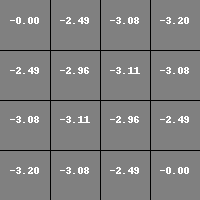

------------------------


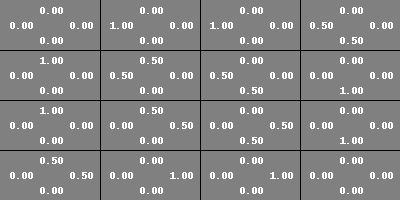

In [7]:
def find_greedy_policy(state_values, rewards, gamma) :
  policy_array  = [[ [0,0,0,0] for i in range(4)] for j in range(4)]

  for i in range(4) :
    for j in range(4) :

      ## Inicialmente, vamos descartar os estados finais.
      if (i == j == 0) :
          continue
      if (i == j == 3) :
          continue

      state = (i,j)

      up = move_up(state)
      rg = move_right(state)
      dw = move_down(state)
      lf = move_left(state)

      best_state = max( (
          rewards[up[0]][up[1]] + gamma*state_values[up[0]][up[1]],
          rewards[rg[0]][rg[1]] + gamma*state_values[rg[0]][rg[1]],
          rewards[dw[0]][dw[1]] + gamma*state_values[dw[0]][dw[1]],
          rewards[lf[0]][lf[1]] + gamma*state_values[lf[0]][lf[1]]
        )
      )

      ## Criando um array para facilitar o algoritmo
      neighbors = [ up, rg, dw, lf ]

      ## Computando o número de empates para criar uma política estocástica
      ties = 0
      for neighbor in neighbors :
        if rewards[neighbor[0]][neighbor[1]] + gamma*state_values[neighbor[0]][neighbor[1]] == best_state :
          ties += 1
      prob = 1.0/ties

      ## Verificando quem possui valor igual ao melhor
      for k in range(4) :
        neighbor  = neighbors[k]
        if rewards[neighbor[0]][neighbor[1]] + gamma*state_values[neighbor[0]][neighbor[1]] == best_state :
          policy_array[i][j][k] = 1.0/ties
  return policy_array

policy = find_greedy_policy(state_values, rewards, gamma)

display(gw.draw_state_values(state_values))
print("------------------------")
display(gw.draw_policy(policy))

# Algoritmo Para Melhorar a Política

Um algoritmo que iterativamente encontra melhores políticas pode ser construído da seguinte forma:



1.   Primeiramente, escolhemos uma política ao acaso.
2.   Feito isso, computamos todos os state-values. Chamaremos esse passo de **Evaluation**.
3.   Esses state-values nos permitem gerar uma greedy-policy. Chamaremos esse passo de  **Improvement**.
4.   Feito isso, computamos todos os state-values novamente. Esse passo, continuaremos chamando de **Evaluation**.
5.   Esses state-values nos permitem gerar uma greedy-policy de novo. Esse passo será novamente chamado de  **Improvement**.
6.   Continuaremos fazendo isso até não ser mais possível melhorar a nossa política.


## Novo Cenário
No exemplo anterior, usamos um cenário em que a política ótima é alcançada em apenas uma iteração.
Vamos criar alguns obstáculos em algumas células do grid para que a política ótima seja obtida em um número maior de passos. Em outras palavras, vamos eleger três células que darão no ratinho um choque maior.

As células (2,3), (3,3) e (4,3), quando alcançadas, fornecem uma penalidade de -100.


In [8]:
## Resumo inicial
def find_optimal_policy(rewards, gamma, evaluation_steps = 10000) :
    policy_cell = [0.25, 0.25, 0.25, 0.25] # Primeira política
    policy     = [[policy_cell for i in range(4)] for j in range(4)]
    policy[0][0] = [0.00, 0.00, 0.00, 0.00]
    policy[3][3] = [0.00, 0.00, 0.00, 0.00]

    ## Vamos guardar todas as políticas neste array.
    all_policies = []

    ## Vamos guardar todos os state-values neste array.
    all_states   = []

    while True :
       state_values, all_values = find_state_values(rewards, policy, gamma, steps = evaluation_steps)
       new_policy      = find_greedy_policy(state_values, rewards, gamma)

       if policy == new_policy :
          return policy, all_policies, all_states

       all_policies.append(policy)
       all_states.append(state_values)

       policy = new_policy

####
rewards = [
    [-1, -1, -1, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1]
]
gamma = 0.7
optimal, all_policies, all_states = find_optimal_policy(rewards, gamma)

images = []
for value in all_states :
  images.append(gw.draw_state_values(value))
gw.display_sequence(images)

print("-------")

images = []
for value in all_policies :
  images.append(gw.draw_policy(value))
gw.display_sequence(images)


interactive(children=(IntSlider(value=1, description='frame', max=2), Output()), _dom_classes=('widget-interac…

-------


interactive(children=(IntSlider(value=1, description='frame', max=2), Output()), _dom_classes=('widget-interac…

<function grid_world.display_sequence.<locals>._show(frame=(0, 2))>

Note que neste novo cenário foram necessárias três iterações da política para convergirmos para uma situação ótima. Vamos explicar os três quadros:

* **Quadro 0:** este quadro é o inicial, criado seguindo a ideia de que em cada estado as ações são equiprováveis.

* **Quadro 1:** este quadro foi criado a partir dos valores de estado do Quadro 0. Note que várias células já possuem uma estratégia ótima. Por exemplo:

    * as células próximas do canto superior esquerdo já seguem nessa direção para permitir a saída do agente com o número mínimo de passos.
    * As células adjacentes às marcadas com -100 de recompensa já entenderam que é importante evitar o caminho que cruza as grandes penalidades.

 Entretanto, a célula que está no canto superior direito é bastante problemática (chamaremos, por isso, esta célula de "célula problemática"). Note que o agente jamais conseguirá sair dessa célula, dado que a política pede para o agente bater na parede de cima ou na parede da direita. Precisamos entender o motivo de isso o ocorrer.

    * Do lado esquerdo da célula problemática, existe uma posição  adjacente a uma célula -100 (ela está acima do -100). Nesse caso, como no Quadro 0 a probabilidade de cair no -100 era de $\frac{1}{4}$, o agente entende que esta célula é muito arriscada, evitando chegar nela.

    * Abaixo da célula problemática, existe outra posição  adjacente a uma célula -100 (ela está do lado diretio da célula -100). Nesse caso, como no Quadro 0 a probabilidade de cair no -100 era de $\frac{1}{4}$, o agente entende que esta célula é muito arriscada, evitando chegar nela.

 Assim, a célula problemática está evitando ir para a esquerda e ir para baixo, o que a força a bater na parede de cima e na parede do lado direito.

 * Quadro 2: este quadro já possui uma política ótima. Neste caso, o agente (ratinho) pode usar essa política como um oráculo e, a cada instante, usar este oráculo para sair da caixa no menor tempo possível.

## Diminuindo o Número de Iterações

Até o momento, temos usado o algoritmo que itera entre **evaluation** e **improvement** de uma maneira rígida:

1. Executamos **evaluation** até a convergência.
2. Executamos o **improvement**.

Entretanto, podemos encontrar as políticas ótimas com um número muito menor de passos se não tentarmos convergir o **evaluation**.

Em outras palavras, podemos usar um número menor de iterações em **evaluation** para nos aproximarmos da direção correta, sempre fazendo progressos, mas sem a preocupação em concluir a obtenção dos valores de estado. Fazendo isso, podemos diminuir o tempo computacional necessário.

A seguir, vamos repetir o passo de encontrar as políticas ótimas. Entretanto, vamos executar apenas 5 passos do algoritmo de evaluation.

In [9]:
rewards = [
    [-1, -1, -1, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1],
    [-1, -1, -100, -1]
]
gamma = 0.7
optimal, all_policies, all_states = find_optimal_policy(rewards, gamma,evaluation_steps=5)

images = []
for value in all_states :
  images.append(gw.draw_state_values(value))
gw.display_sequence(images)

print("-------")

images = []
for value in all_policies :
  images.append(gw.draw_policy(value))
gw.display_sequence(images)

interactive(children=(IntSlider(value=1, description='frame', max=2), Output()), _dom_classes=('widget-interac…

-------


interactive(children=(IntSlider(value=1, description='frame', max=2), Output()), _dom_classes=('widget-interac…

<function grid_world.display_sequence.<locals>._show(frame=(0, 2))>

## Exercício

Além da diminuição do número de passos em **evaluation**, podemos desejar que as iterações não ocorram de maneira ordenada como temos feito até agora. Podemos, por exemplo, escolher uma célula ao acaso e atualizar o valor daquela célula baseando-nos nos valores das células ao redor. Isso também irá convergir se todos os estados forem visitados. A vantagem dessa estratégia será, por exemplo, alterar mais vezes uma região próxima daquelas que tiveram seus pesos alterados, o que traria algum ganho computacional. Implemente essa estratégia em um algoritmo de **evaluation** e analise o desempenho.
